In [167]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.weightstats import ttest_ind
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklego.meta import ZeroInflatedRegressor
from sklearn.svm import SVC


import statsmodels.api as sm
from statsmodels.formula.api import ols

## Upload and review the data


In [168]:
main_original_df = pd.read_excel(r'C:\Users\nirro\Downloads\deloitte\Bike.xlsx',sheet_name='Data')
main_dict = pd.read_excel(r'C:\Users\nirro\Downloads\deloitte\Bike.xlsx',sheet_name='Dic')

In [169]:
main_original_df.head(100)

,instant,dteday,season,yr,mnth,hr,TD,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,1,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,1,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,1,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,1,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [170]:
main_dict.head()

,Data Dictionary
0,NaN
1,The names of the original columns and their de...
2,1) instant: refers to the record index.
3,2) dteday: refers to the date.
4,"3) season: season wherein (1:winter,2:spring, ..."


### find missing values in dataframe
#### no missing values!!

In [171]:
main_original_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
TD            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [172]:
# extract the data frame columns
main_original_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'TD', 'holiday',
       'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [173]:
# get columns dtype
main_original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   TD          17379 non-null  int64         
 7   holiday     17379 non-null  int64         
 8   weekday     17379 non-null  int64         
 9   workingday  17379 non-null  int64         
 10  weathersit  17379 non-null  int64         
 11  temp        17379 non-null  float64       
 12  atemp       17379 non-null  float64       
 13  hum         17379 non-null  float64       
 14  windspeed   17379 non-null  float64       
 15  casual      17379 non-null  int64         
 16  registered  17379 non-

In [174]:
main_original_df.describe()

,instant,season,yr,mnth,hr,TD,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,1.508372,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,1.115691,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,2.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,3.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,3.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Plot the distribution of the target - a long tail to the right

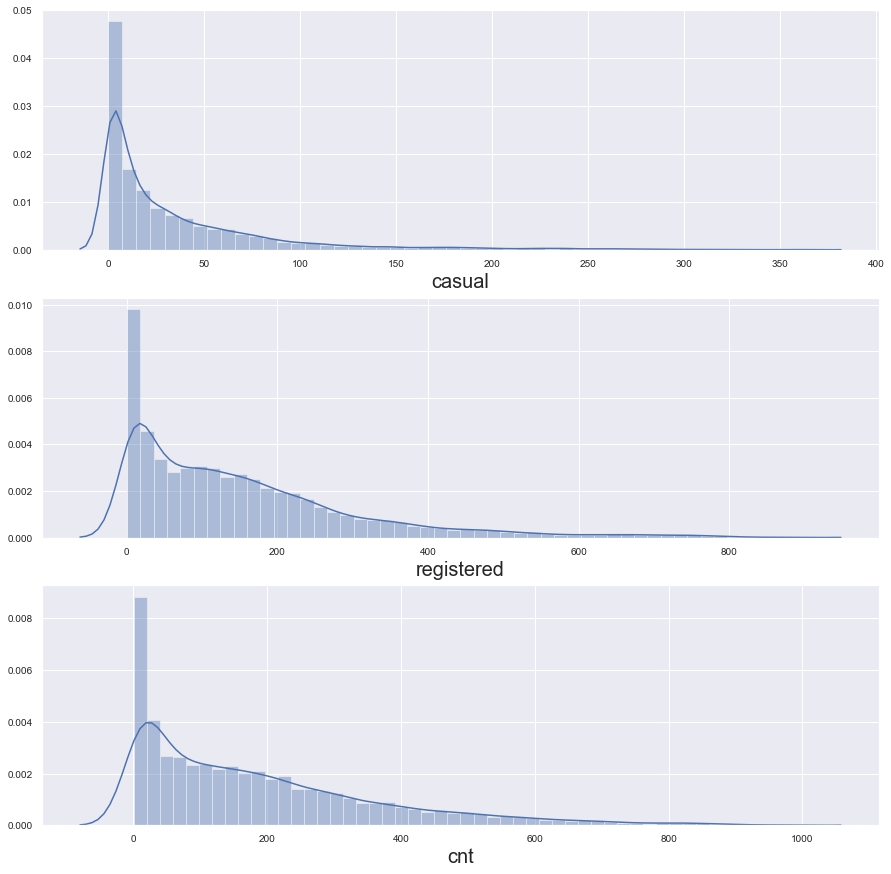

In [202]:
y_list = ['casual','registered','cnt']
fig, ax1 = plt.subplots(3,figsize=(15,15))

for i,y_col in enumerate(y_list):
    sns.set(style="darkgrid")
    b = sns.distplot(main_original_df[f'{y_col}'],ax=ax1[i])
    
#     axes.set_title("Title",fontsize=50)
    b.set_xlabel(f"{y_col}",fontsize=20)
    b.tick_params(labelsize=10)
#     plt.show()


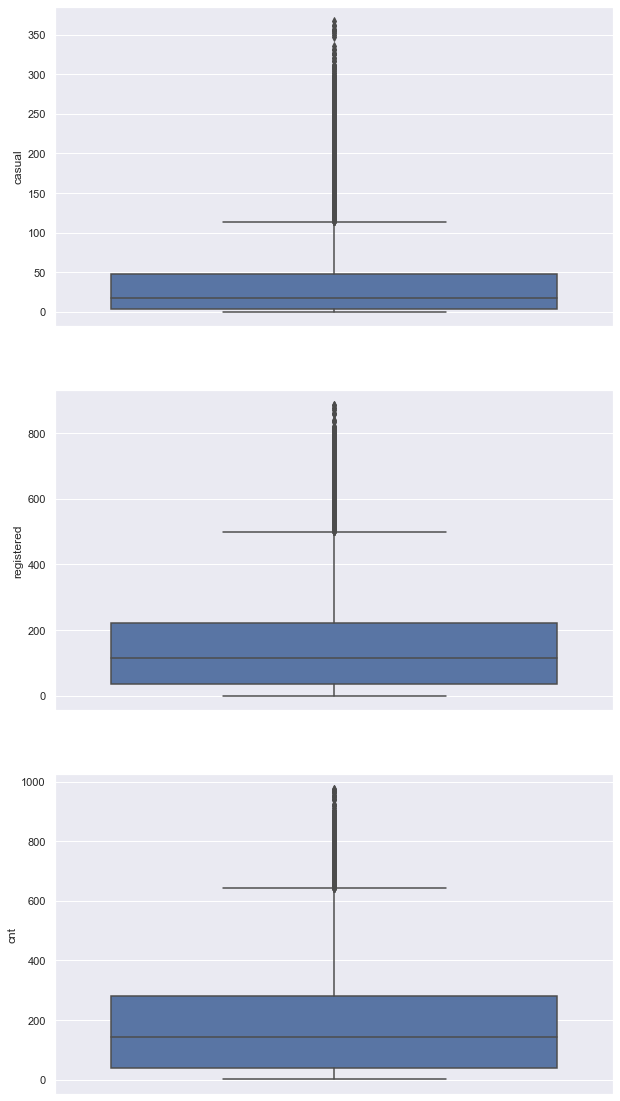

In [176]:
y_list = ['casual','registered','cnt']
fig, ax1 = plt.subplots(3,figsize=(10,20))

for i,y_col in enumerate(y_list):
#     sns.set(style="darkgrid")
    sns.boxplot(main_original_df[f'{y_col}'],ax=ax1[i],orient="v")

### plot as time series

In [177]:
main_original_df.head(10)

,instant,dteday,season,yr,mnth,hr,TD,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,1,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,1,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,1,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,1,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [178]:
# # add hour to date column
# def am_pm(row):
#     if row['TD'] in (0,1):
#         val = row['hr']
#     elif row['TD'] in (2,3):
#         val = row['hr']
#     return val
# main_original_df['hour_am_pm'] = main_original_df.apply(am_pm,axis=1)
# main_original_df['hour_time'] =pd.to_datetime(main_original_df['hr'],format='H:M:S')
# main_original_df.head(30)
main_original_df['hour_time'] = pd.to_timedelta(main_original_df['hr'].astype(int),unit='h')
print(main_original_df['hour_time'].dtype)
print(main_original_df['dteday'].dtype)
main_original_df['new_date_time'] = main_original_df['dteday'] + main_original_df['hour_time']

timedelta64[ns]
datetime64[ns]


(array([734138. , 734138.5, 734139. , 734139.5, 734140. , 734140.5,
        734141. , 734141.5, 734142. , 734142.5]),
 <a list of 10 Text major ticklabel objects>)

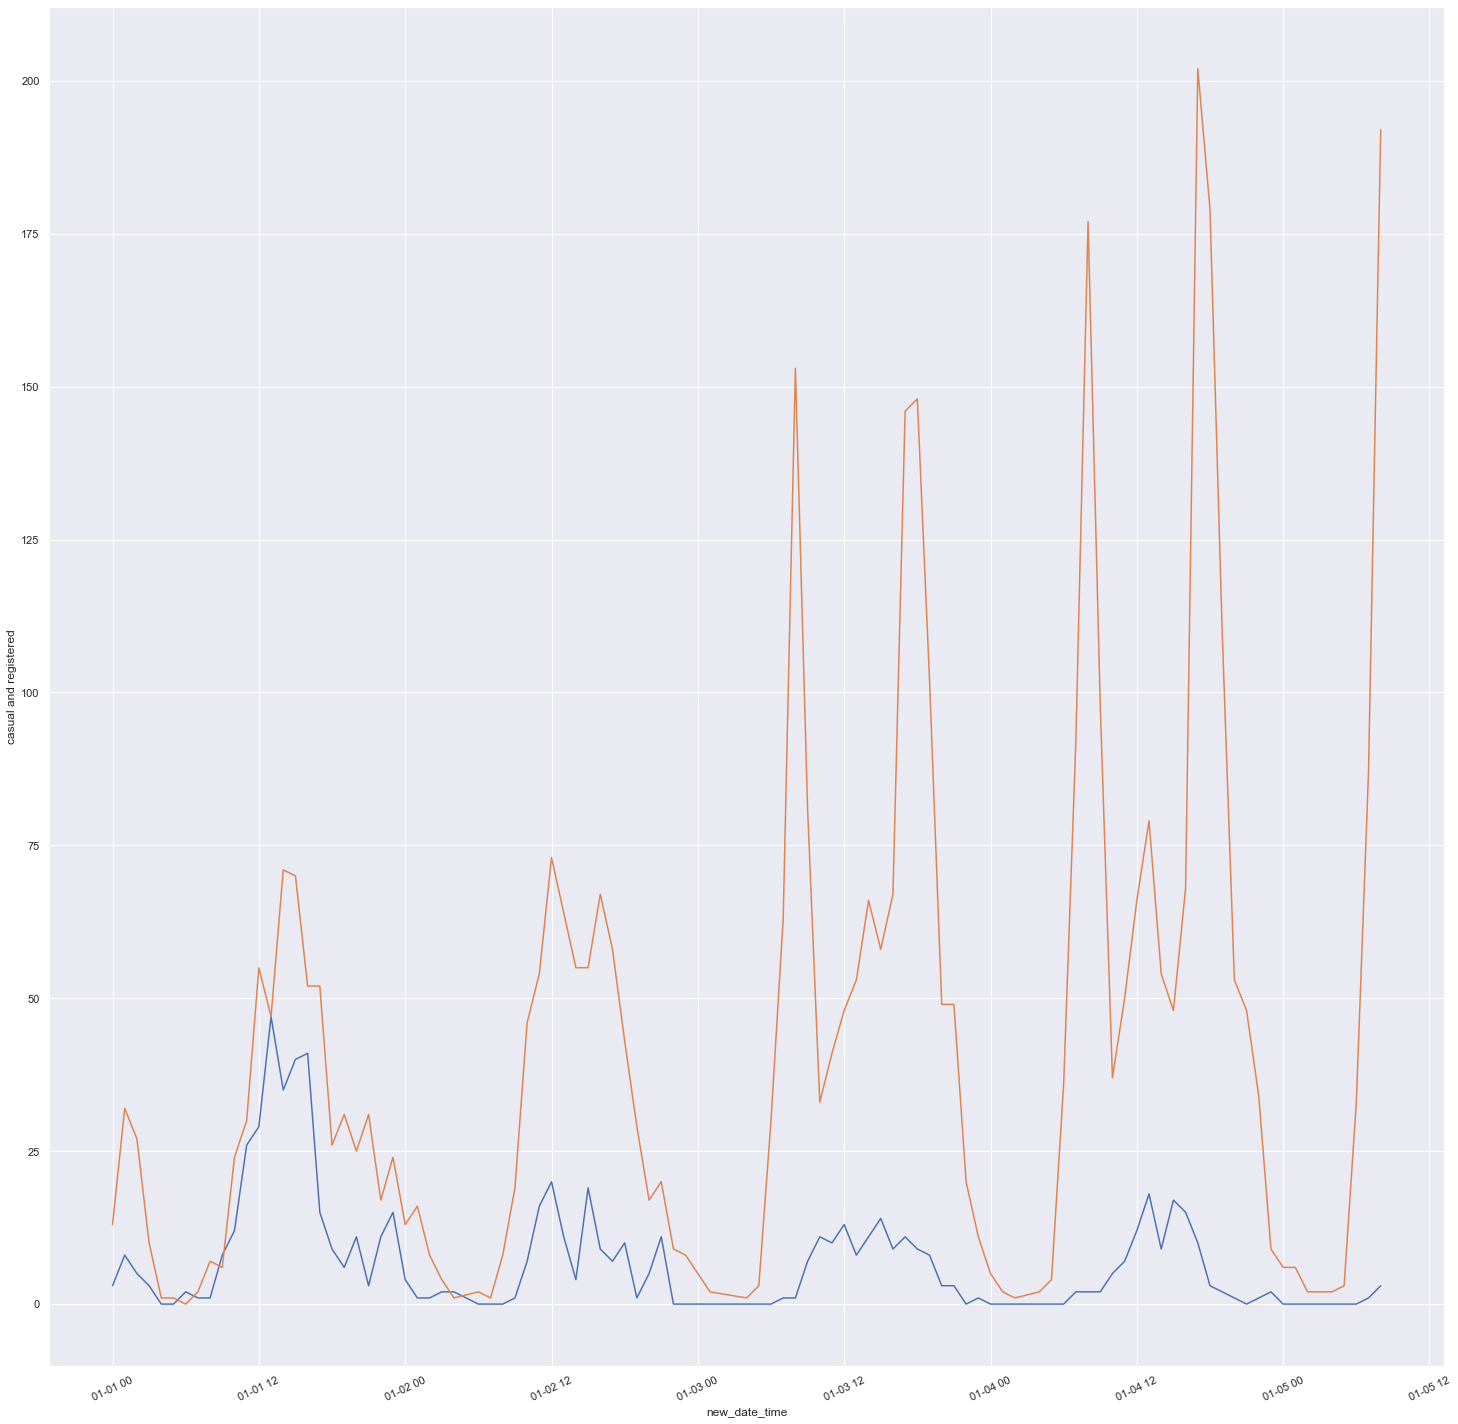

In [179]:
# create the time series plot
plt.figure(figsize=(25,25))
sns.lineplot(x = "new_date_time", y = "casual", data = main_original_df.iloc[:100])
sns.lineplot(x = "new_date_time", y = "registered", data = main_original_df.iloc[:100])
plt.ylabel("casual and registered")
plt.xticks(rotation = 25)

### get the columns with few categories or numbers

In [181]:
# count number in each group for each column
for column in main_original_df.columns:
#     print(column)
    if column in ['casual','registered','cnt']:
        print(column)
        print(main_original_df[column].value_counts())
        print(main_original_df[column].value_counts(normalize=True))

casual
0      1581
1      1082
2       798
3       697
4       561
5       509
6       448
7       405
8       377
9       348
10      317
11      315
12      299
13      258
14      233
15      225
17      219
16      218
18      212
19      206
27      193
20      189
21      173
31      164
25      158
33      155
24      155
22      152
28      152
23      151
26      147
29      147
30      146
34      131
40      125
32      117
42      113
37      111
36      111
41      107
35      107
38      105
39      105
49       98
55       94
44       93
47       93
48       90
45       89
50       87
51       87
53       85
56       83
46       80
61       80
43       79
54       78
52       78
63       75
69       74
57       73
59       72
66       69
60       69
62       68
58       68
68       64
74       61
67       61
65       58
72       58
77       57
70       57
78       57
64       55
71       54
79       51
75       50
88       50
73       50
76       50
80       47
85       

### categorical columns analysis

In [182]:
# count number in each group
for column in main_original_df.columns:
#     print(column)
    if column in ['season', 'yr', 'mnth', 'hr', 'TD', 'holiday',
            'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum','windspeed']:
        print(column)
        print(main_original_df[column].value_counts())
        print(main_original_df[column].value_counts(normalize=True))

season
3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64
3    0.258703
2    0.253697
1    0.244088
4    0.243512
Name: season, dtype: float64
yr
1    8734
0    8645
Name: yr, dtype: int64
1    0.502561
0    0.497439
Name: yr, dtype: float64
mnth
5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: mnth, dtype: int64
5     0.085621
7     0.085621
12    0.085333
8     0.084873
3     0.084757
10    0.083492
6     0.082859
4     0.082686
9     0.082686
11    0.082686
1     0.082226
2     0.077162
Name: mnth, dtype: float64
hr
17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: hr, dtype: int64
17    0.042005
16    0.042005
13    0.041947
15    0.041947
14    0.041947
12    0.041890
22    0.041890
21

#### try to see any pattern for few users

In [183]:
main_original_df.loc[(main_original_df.casual <10) & (main_original_df.registered <10)].head(100)
# main_original_df.loc[main_original_df.TD==0].head(1000)
# for col in ['season', 'yr', 'mnth', 'hr', 'TD', 'holiday',
#             'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum','windspeed']:
#     print(col)
#     print(main_original_df.loc[(main_original_df.casual <10) & (main_original_df.registered <10)][f'{col}'].value_counts(normalize=True))
#     print('-------------')

,instant,dteday,season,yr,mnth,hr,TD,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hour_time,new_date_time
4,5,2011-01-01,1,0,1,4,0,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,0 days 04:00:00,2011-01-01 04:00:00
5,6,2011-01-01,1,0,1,5,0,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,0 days 05:00:00,2011-01-01 05:00:00
6,7,2011-01-01,1,0,1,6,1,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,0 days 06:00:00,2011-01-01 06:00:00
7,8,2011-01-01,1,0,1,7,1,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,0 days 07:00:00,2011-01-01 07:00:00
8,9,2011-01-01,1,0,1,8,1,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,0 days 08:00:00,2011-01-01 08:00:00
9,10,2011-01-01,1,0,1,9,1,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,0 days 09:00:00,2011-01-01 09:00:00
26,27,2011-01-02,1,0,1,2,0,0,0,0,2,0.42,0.4242,1.00,0.2836,1,8,9,0 days 02:00:00,2011-01-02 02:00:00
27,28,2011-01-02,1,0,1,3,0,0,0,0,2,0.46,0.4545,0.94,0.1940,2,4,6,0 days 03:00:00,2011-01-02 03:00:00
28,29,2011-01-02,1,0,1,4,0,0,0,0,2,0.46,0.4545,0.94,0.1940,2,1,3,0 days 04:00:00,2011-01-02 04:00:00
29,30,2011-01-02,1,0,1,6,1,0,0,0,3,0.42,0.4242,0.77,0.2985,0,2,2,0 days 06:00:00,2011-01-02 06:00:00


## Use plot the see any patterns

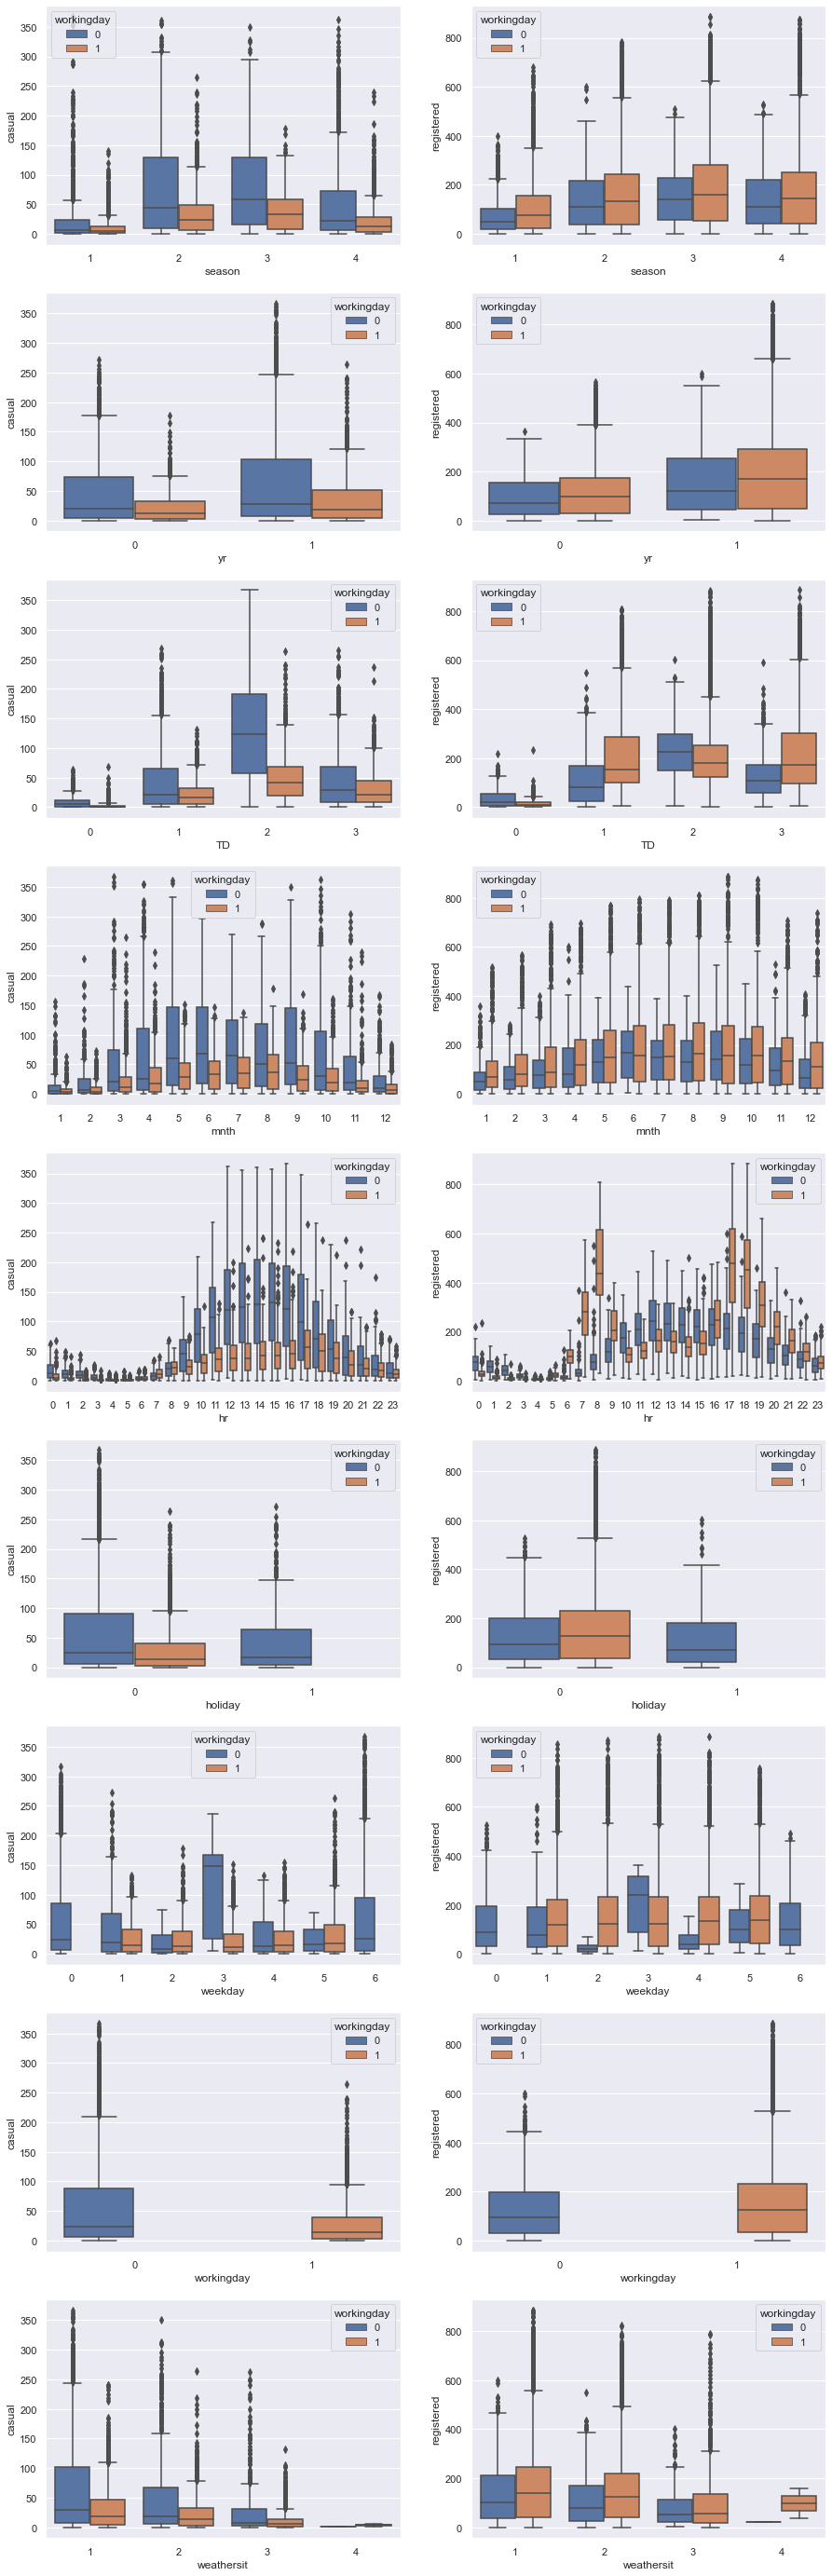

In [184]:
# ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'TD', 'holiday',
#        'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
#        'windspeed', 'casual', 'registered', 'cnt']
columns_list = ['season', 'yr', 'TD', 'mnth', 'hr','holiday','weekday', 'workingday', 'weathersit']  
y_list = ['casual','registered']
fig, ax1 = plt.subplots(9,2,figsize=(15,50))

for i,col in enumerate(columns_list):
    for i2,col2 in enumerate(y_list):
        sns.boxplot(data=main_original_df, x=col, y=col2,ax=ax1[i,i2],hue='workingday')
        


# insights 

### season: (1:winter,2:spring, 3:summer, 4:fall) - not many casual users in the winter 

###  yr: year(0:2011, 1:2012) - there is an rise in users in 2012

### TD - almost no rental at TD=0

### month - as seen in the winter there is a decline in casual user, mnth in [11,12,1,2] 

### hr- hour
### for registered users there are two peaks in the day
### first peek - between 7-9
### second peek - between 16-19
### both groups (casual and registreted) of users rarely used in the night (0-6)

### holiday: whether the day is a holiday (0) or not (1). - registered users have higher median use on holiday, for casual users the median is the same

### weekday - casual users rent more on the weekends

### workingday: if the day is neither weekend nor a holiday then it is represented as 1, otherwise 0.-  again casual users rent more on the weekends or holidays

### weathersit: refers to the weather situation,  - as seen in the winter there is a decline in users in both type of users as the weathersit increase


### use a scatterplot to see patterns - in continuous data

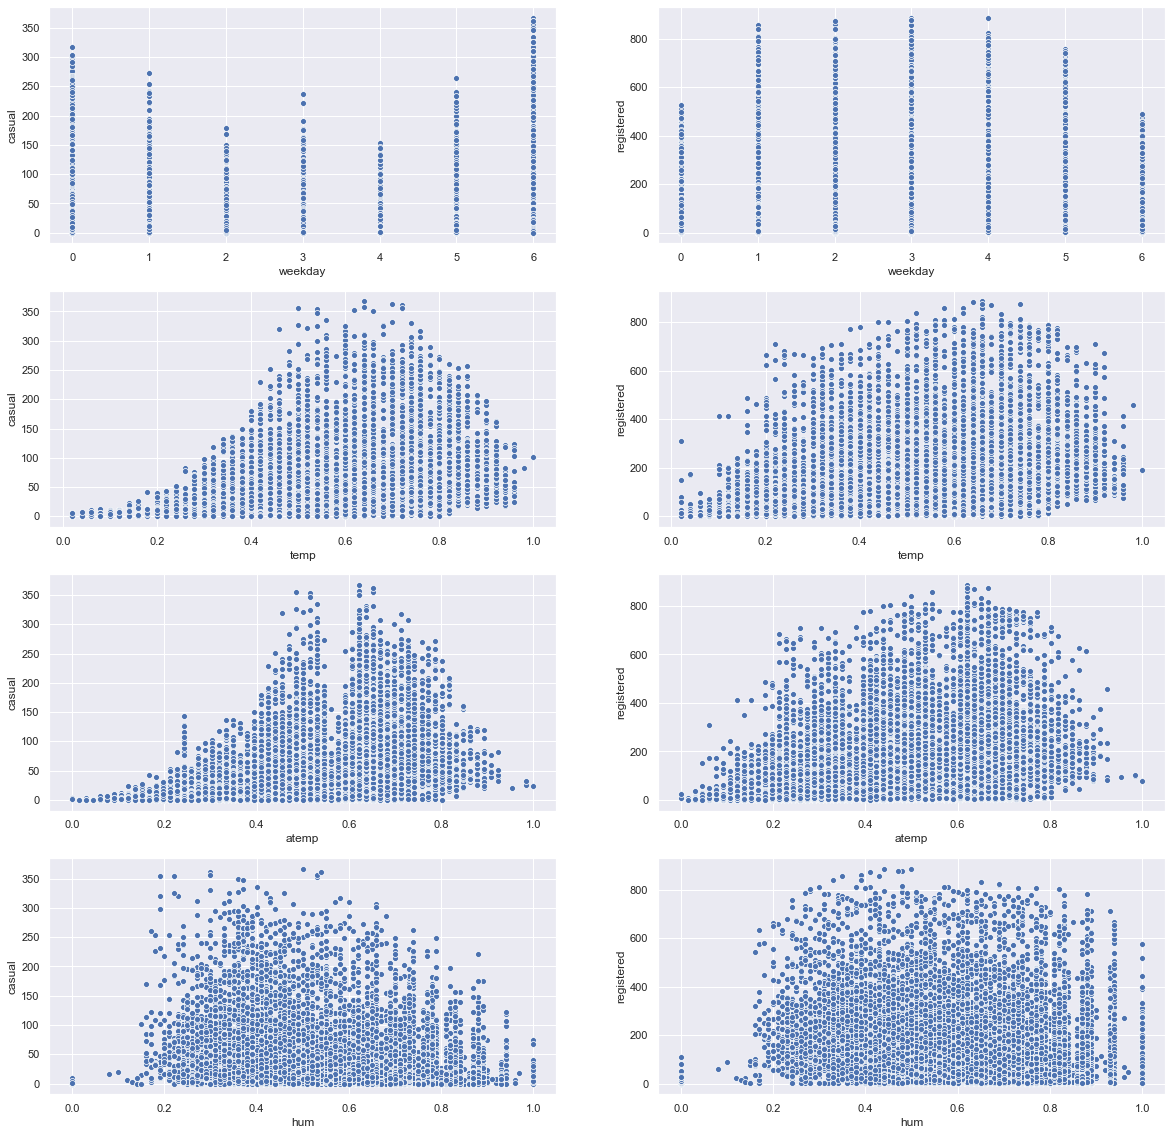

In [185]:
# ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'TD', 'holiday',
#        'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
#        'windspeed', 'casual', 'registered', 'cnt']

columns_list = ['weekday','temp', 'atemp', 'hum']  
y_list = ['casual','registered']
fig, ax1 = plt.subplots(4,2,figsize=(20,20))

for i,col in enumerate(columns_list):
    for i2,col2 in enumerate(y_list):
        sns.scatterplot(data=main_original_df, x=col, y=col2,ax=ax1[i,i2])

### try visualizing in 3D - relationship between casual~temp~hum

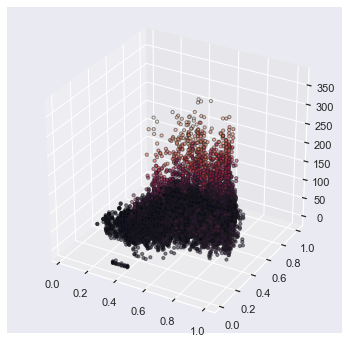

In [186]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(main_original_df['temp'], main_original_df['hum'], main_original_df['casual'],
           linewidths=1, alpha=.5,
           edgecolor='k',
           s = 10,
           c=main_original_df['casual'])
plt.show()

### check for correlation (pearson)


In [187]:
corr = main_original_df.drop(columns=['instant'],axis=1).corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')

,season,yr,mnth,hr,TD,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.010742,0.830386,-0.006117,-0.006989,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,-0.010742,1.000000,-0.010473,-0.003867,-0.004345,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.830386,-0.010473,1.000000,-0.005772,-0.006543,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.006117,-0.003867,-0.005772,1.000000,0.968959,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
TD,-0.006989,-0.004345,-0.006543,0.968959,1.000000,0.000560,-0.003717,0.002345,-0.019472,0.140280,0.136422,-0.284051,0.140959,0.307688,0.405649,0.422126
holiday,-0.009585,0.006692,0.018430,0.000479,0.000560,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,-0.002335,-0.004485,0.010400,-0.003498,-0.003717,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,0.013743,-0.002196,-0.003477,0.002285,0.002345,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014524,-0.019157,0.005400,-0.020203,-0.019472,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.312025,0.040913,0.201691,0.137603,0.140280,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


In [188]:
corr = main_original_df.drop(columns=['instant'],axis=1).corr(method='pearson') 
corr[['casual','registered','cnt']].style.background_gradient(cmap='coolwarm')

,casual,registered,cnt
season,0.120206,0.174226,0.178056
yr,0.142779,0.253684,0.250495
mnth,0.068457,0.122273,0.120638
hr,0.301202,0.374141,0.394071
TD,0.307688,0.405649,0.422126
holiday,0.031564,-0.047345,-0.030927
weekday,0.032721,0.021578,0.026900
workingday,-0.300942,0.134326,0.030284
weathersit,-0.152628,-0.120966,-0.142426
temp,0.459616,0.335361,0.404772


### check for correlation (spearman)

In [189]:
# lets try spearmans corelation for ordinal categories
corr = main_original_df.drop(columns=['instant'],axis=1).corr(method='spearman')
corr[['casual','registered','cnt']].style.background_gradient(cmap='coolwarm')

,casual,registered,cnt
season,0.183701,0.182399,0.185179
yr,0.114742,0.221027,0.207500
mnth,0.118084,0.127066,0.125889
hr,0.476666,0.510569,0.510878
TD,0.492870,0.549241,0.546227
holiday,0.015943,-0.043526,-0.029526
weekday,0.012672,0.034711,0.030297
workingday,-0.176671,0.083105,0.021033
weathersit,-0.160280,-0.112062,-0.126276
temp,0.570989,0.373196,0.423330


### Use ANOVA test for categorical columns - (season,mnth,weekday,weathersit)


In [190]:

anova_df = main_original_df[['season','mnth','weekday','weathersit','casual','registered']]
for col in ['season','mnth','weekday','weathersit']:
    for y_col in ['casual','registered']:
        model = ols(f'{y_col} ~ {col}', data=anova_df).fit()
        print(f'{y_col} ~ {col}')
        print(sm.stats.anova_lm(model, typ=2))
        print('---------------------')
    

# if p < 0.05, this means that the categorical variable has significant influence on the numerical variable
# if p > 0.05, this means that the categorical variable has no significant influence on the numerical variable

casual ~ season
                sum_sq       df           F        PR(>F)
season    6.104327e+05      1.0  254.771874  6.011151e-57
Residual  4.163524e+07  17377.0         NaN           NaN
---------------------
registered ~ season
                sum_sq       df           F         PR(>F)
season    1.208455e+07      1.0  543.983781  1.685363e-118
Residual  3.860285e+08  17377.0         NaN            NaN
---------------------
casual ~ mnth
                sum_sq       df          F        PR(>F)
mnth      1.979802e+05      1.0  81.819045  1.645466e-19
Residual  4.204769e+07  17377.0        NaN           NaN
---------------------
registered ~ mnth
                sum_sq       df           F        PR(>F)
mnth      5.952061e+06      1.0  263.741046  7.122155e-59
Residual  3.921610e+08  17377.0         NaN           NaN
---------------------
casual ~ weekday
                sum_sq       df         F    PR(>F)
weekday   4.523207e+04      1.0  18.62534  0.000016
Residual  4.220044e+07  173

### p < 0.05 for all columns so we can say that variable has significant influence on the target

### use T-test for categorical (binary) columns - (yr,holiday,workingday)

In [191]:
# Assumptions
# there are three assumptions that we can make regarding the data groups:
# Whether the two samples data groups are independent.
# Whether the data elements in respective groups follow any normal distribution.
# Whether the given two samples have similar variances. This assumption is also known as the homogeneity assumption.



ttest_df = main_original_df[['yr','holiday','workingday','casual','registered']]
for col in ['yr','holiday','workingday']:
    for col_y in ['casual','registered']:
        print(f'{col_y} ~ {col}')
        print(ttest_ind(ttest_df[f'{col_y}'][ttest_df[f'{col}'] == 0],
                        ttest_df[f'{col_y}'][ttest_df[f'{col}'] == 1]))
        

casual ~ yr
(-19.016156613561954, 8.099087744279772e-80, 17377.0)
registered ~ yr
(-34.572089326972, 2.361304684494619e-253, 17377.0)
casual ~ holiday
(-4.162850031219883, 3.158140321233628e-05, 17377.0)
registered ~ holiday
(6.2481682519755175, 4.249584200325769e-10, 17377.0)
casual ~ workingday
(41.59924056323956, 0.0, 17377.0)
registered ~ workingday
(-17.8690171201076, 8.836081675926127e-71, 17377.0)


## Correlation conclusion
#### for casual users the most correlated (spearman,pearson) columns are hour,TD, workingday, temp, hum.
#### for registered users the most correlated (spearman,pearson) columns are hour,TD, temp, hum.
#### using anova test we saw that columns - 'season','mnth','weekday','weathersit' has significant influence on the target
#### using t test we saw that columns -'yr','holiday','workingday' has significant influence on the target 
#### (except for the relation of casual  ~ workingday with p-value=0 which is >0.05) - has no significant influence!!

# Build the models

#### Because both casual and registered users have different relations with variables.
#### I decided to build a model for each one (casual and registered) and then combine the results for the prediction of the total amount (cnt)

### using cross-validation to evaluate the performance

In [192]:
# ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'TD', 'holiday',
#        'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
#        'windspeed', 'casual', 'registered', 'cnt']


# create a column for rush hour temp and hum
def rush(row):
    if (row['hr'] in [7,8,9,16,17,18,19]) & (row['workingday'] == 1):
        val = 1
    else:
        val = 0
    return val

def bad_hum(row):
    if (row['hum'] > 0.7) | (row['hum'] <0.2):
        val = 1
    else:
        val = 0
    return val

def bad_temp(row):
    if (row['temp'] > 0.7) | (row['temp'] <0.2):
        val = 1
    else:
        val = 0
    return val


zir = ZeroInflatedRegressor(
    classifier=RandomForestClassifier(random_state=0),
    regressor=RandomForestRegressor(random_state=0)
)


rf = RandomForestRegressor()
lr = LinearRegression()

x_data = main_original_df[['season', 'yr', 'mnth', 'hr', 'TD', 'holiday',
                           'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum','windspeed']]



# get dummies
data_dummies = pd.get_dummies(data=x_data,columns=['mnth', 'hr','season','mnth', 'hr','TD','weekday'])

# create a column for rush hour
data_dummies['rush_hour'] = x_data.apply(rush, axis=1)

# create a column for bad temp or hum
data_dummies['bad_hum'] = x_data.apply(bad_hum, axis=1)

data_dummies['bad_temp'] = x_data.apply(bad_temp, axis=1)

# y target columns for each model
y_casual_data = main_original_df['casual']
y_registered_data = main_original_df['registered']

# split the data into train test - for casual
x_casual_train, x_casual_test, y_casual_train, y_casual_test = train_test_split(
    data_dummies, y_casual_data, test_size=0.33, random_state=42)

# split the data into train test - for registered
x_registered_train, x_registered_test, y_registered_train, y_registered_test = train_test_split(
    data_dummies, y_registered_data, test_size=0.33, random_state=42)

In [203]:
data_dummies.columns

Index(['yr', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_0',
       'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9',
       'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17',
       'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'season_1',
       'season_2', 'season_3', 'season_4', 'mnth_1', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5',
       'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13',
       'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21',
       'hr_22', 'hr_23', 'TD_0', 'TD_1', 'TD_2', 'TD_3', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'wee

In [207]:
print(x_casual_train.shape)
print(y_casual_train.shape)
print(x_casual_test.shape)
print(y_casual_test.shape)

(11643, 98)
(11643,)
(5736, 98)
(5736,)


In [211]:
# print('casual - original')
# print(np.abs(np.mean(cross_val_score(lr, x_data, y_casual_data, cv=5,scoring='r2'))))
# print(np.abs(np.mean(cross_val_score(lr, x_data, y_casual_data, cv=5,scoring='neg_root_mean_squared_error'))))
# print('---------------------')

# print('casual - dummies')
# print(np.abs(np.mean(cross_val_score(lr, data_dummies, y_casual_data, cv=5,scoring='r2'))))
# print(np.abs(np.mean(cross_val_score(lr, data_dummies, y_casual_data, cv=5,scoring='neg_root_mean_squared_error'))))
# print('---------------------')


print('casual for lr')
print(np.abs(np.mean(cross_val_score(lr, x_casual_train, y_casual_train, cv=5,scoring='r2'))))
print(np.abs(np.mean(cross_val_score(lr, x_casual_train, y_casual_train, cv=5,scoring='neg_root_mean_squared_error'))))
print('---------------------')

print('casual for zr')
print(np.abs(np.mean(cross_val_score(zir, x_casual_train, y_casual_train, cv=5,scoring='r2'))))
print(np.abs(np.mean(cross_val_score(zir, x_casual_train, y_casual_train, cv=5,scoring='neg_root_mean_squared_error'))))
print('---------------------')

print('casual for rf')
print(np.abs(np.mean(cross_val_score(rf, x_casual_train, y_casual_train, cv=5,scoring='neg_root_mean_squared_error'))))
print(np.abs(np.mean(cross_val_score(rf, x_casual_train, y_casual_train, cv=5,scoring='r2'))))
print('---------------------')


# casual - original
# 0.2149363487622588
# 37.85730261384514
# ---------------------
# casual - dummies
# 0.35627938447168
# 33.41652661565087
# ---------------------
# casual - dummies2
# 0.35727521485380287
# 33.39187593746378

# --------------------
# casual - dummies2
# 0.5867752245669144
# 31.522322610831452

casual for lr
0.5927308336732089
31.29383925121557
---------------------
casual for zr
0.8883458939734321
16.3788387303898
---------------------
casual for rf
16.310224040876495
0.8877603809208537
---------------------


In [195]:
# print('casual - original')
# print(np.abs(np.mean(cross_val_score(rf, x_data, y_casual_data, cv=5,scoring='neg_root_mean_squared_error'))))
# print('---------------------')

# print('casual - dummies')
# print(np.abs(np.mean(cross_val_score(rf, data_dummies, y_casual_data, cv=5,scoring='neg_root_mean_squared_error'))))
# print('---------------------')


print('casual for rf')
print(np.abs(np.mean(cross_val_score(rf, x_casual_train, y_casual_train, cv=5,scoring='neg_root_mean_squared_error'))))
print(np.abs(np.mean(cross_val_score(rf, x_casual_train, y_casual_train, cv=5,scoring='r2'))))

# casual - original
# 22.515440013648554
# ---------------------
# casual - dummies
# 22.034948299269494
# ---------------------
# casual - dummies2
# 21.792739837626545

casual - dummies2
16.389119817303293
0.8888723356187216


### registered users prediction

In [210]:
# print('registered - original')
# print(np.abs(np.mean(cross_val_score(lr, x_casual_train, y_casual_train, cv=5,scoring='r2'))))
# print(np.abs(np.mean(cross_val_score(lr, x_data, y_registered_data, cv=5,scoring='neg_root_mean_squared_error'))))
# print('---------------------')

# print('registered - dummies')
# print(np.abs(np.mean(cross_val_score(lr, data_dummies, y_registered_data, cv=5,scoring='r2'))))
# print(np.abs(np.mean(cross_val_score(lr, data_dummies, y_registered_data, cv=5,scoring='neg_root_mean_squared_error'))))
# print('---------------------')

print('registered for lr')
print(np.abs(np.mean(cross_val_score(lr,x_registered_train, y_registered_train, cv=5,scoring='r2'))))
print(np.abs(np.mean(cross_val_score(lr, x_registered_train, y_registered_train, cv=5,scoring='neg_root_mean_squared_error'))))
print('---------------------')

print('registered for zr')
print(np.abs(np.mean(cross_val_score(zir, x_registered_train, y_registered_train, cv=5,scoring='r2'))))
print(np.abs(np.mean(cross_val_score(zir, x_registered_train, y_registered_train, cv=5,scoring='neg_root_mean_squared_error'))))
print('---------------------')

print('registered for rf')
print(np.abs(np.mean(cross_val_score(rf, x_registered_train, y_registered_train, cv=5,scoring='neg_root_mean_squared_error'))))
print(np.abs(np.mean(cross_val_score(rf, x_registered_train, y_registered_train, cv=5,scoring='r2'))))
print('---------------------')

# registered - original
# 0.24057257084519096
# 119.68635613690478
# ---------------------
# registered - dummies
# 0.5409415112635632
# 89.18381578571628
# ---------------------
# registered - dummies2
# 0.5370266119433031
# 89.47267646707981

# ---------------------
# registered - dummies2
# 0.6789207713447247
# 86.50769006784698

registered for lr
0.7681433291592619
73.51736190434767
---------------------
registered for zr
0.9388607861441753
37.733904530659
---------------------
registered for rf
38.10148587368103
0.9385904424561108
---------------------


In [ ]:
# print('registered - original')
# print(np.abs(np.mean(cross_val_score(rf, x_data, y_registered_data, cv=5,scoring='neg_root_mean_squared_error'))))
# print('---------------------')

# print('registered - dummies')
# print(np.abs(np.mean(cross_val_score(rf, data_dummies, y_registered_data, cv=5,scoring='neg_root_mean_squared_error'))))
# print('---------------------')

print('registered - dummies2')
print(np.abs(np.mean(cross_val_score(rf, x_registered_train, y_registered_train, cv=5,scoring='neg_root_mean_squared_error'))))
print(np.abs(np.mean(cross_val_score(rf, x_registered_train, y_registered_train, cv=5,scoring='r2'))))

# registered - original
# 52.7203831779902
# ---------------------
# registered - dummies
# 54.39097137757957
# ---------------------
# registered - dummies2
# 53.79197540293403

In [ ]:
# rf = RandomForestRegressor(n_estimators=500)

true_value = y_registered_test
fited_model = zir.fit(x_registered_train, y_registered_train)
predicted_value = fited_model.predict(x_registered_test)
plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('Registered', fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
# rf = RandomForestRegressor(n_estimators=1000)

true_value = y_casual_test
fited_model = zir.fit(x_casual_train, y_casual_train)
predicted_value = fited_model.predict(x_casual_test)
plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('Casual', fontsize=20)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
y_list = [true_value,predicted_value]
fig, ax1 = plt.subplots(2,figsize=(15,15))

for i,y_col in enumerate(y_list):
    sns.set(style="darkgrid")
    sns.distplot(y_col,ax=ax1[i])
    


In [ ]:
fig, ax1 = plt.subplots(1,figsize=(10,5))
sns.distplot((true_value-predicted_value))